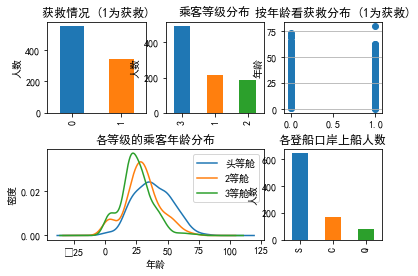

In [32]:
import numpy as np

import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt

from pylab import *

mpl.rcParams['font.sans-serif'] = ['SimHei']   #fig标题显示中文。

data_train = pd.read_csv('ch/Titanic-dataset/train.csv') 
#pclass(舱位等级),SibSp => 堂兄弟/妹个数,Parch => 父母与小孩个数,Cabin => 客舱,Embarked => 登船港口

fig = plt.figure()

fig.set(alpha=0.2)  # 设定图表颜色alpha参数

 

fig.add_subplot(2,3,1)             # 在一张大图里分列几个小图

data_train.Survived.value_counts().plot(kind='bar')# 柱状图 

plt.title(u"获救情况 (1为获救)") # 标题

plt.ylabel(u"人数")  

 

fig.add_subplot(2,3,2)

data_train.Pclass.value_counts().plot(kind="bar")

plt.ylabel(u"人数")

plt.title(u"乘客等级分布")

 

fig.add_subplot(2,3,3)

plt.scatter(data_train.Survived, data_train.Age)

plt.ylabel(u"年龄")                         # 设定纵坐标名称

plt.grid(b=True, which='major', axis='y') 

plt.title(u"按年龄看获救分布 (1为获救)")

 

plt.subplot2grid((2,3),(1,0), colspan=2)

data_train.Age[data_train.Pclass == 1].plot(kind='kde')   

data_train.Age[data_train.Pclass == 2].plot(kind='kde')

data_train.Age[data_train.Pclass == 3].plot(kind='kde')

plt.xlabel("年龄")# plots an axis lable

plt.ylabel("密度") 

plt.title("各等级的乘客年龄分布")

plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.



plt.subplot2grid((2,3),(1,2))

data_train.Embarked.value_counts().plot(kind='bar')

plt.title(u"各登船口岸上船人数")

plt.ylabel(u"人数")  

plt.subplots_adjust(hspace = 0.4)

plt.show()


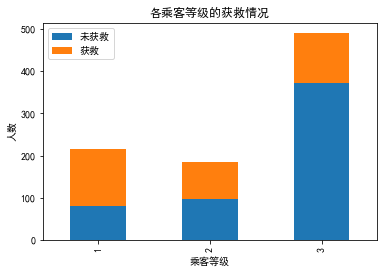

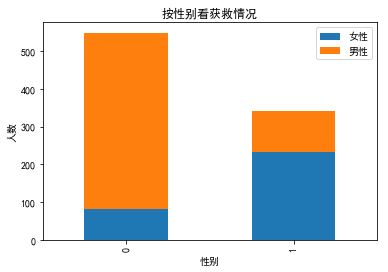

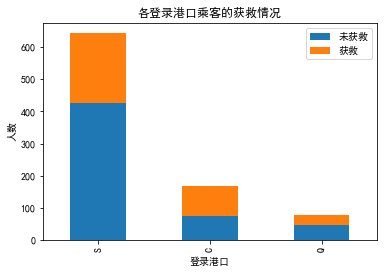

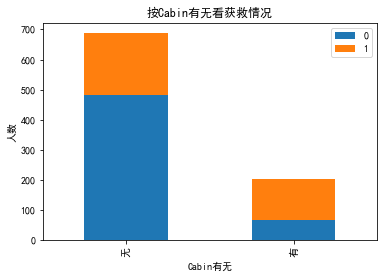

In [51]:
from pylab import *

import numpy as np

import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt

from pandas import DataFrame, Series

mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure()

fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()

Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df1=DataFrame({u'获救':Survived_1, u'未获救':Survived_0})

df1.plot(kind='bar', stacked=True)

plt.title(u"各乘客等级的获救情况")

plt.xlabel(u"乘客等级") 

plt.ylabel(u"人数") 

plt.show()




Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()

Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()

df2=DataFrame({u'男性':Survived_m, u'女性':Survived_f})

df2.plot(kind='bar', stacked=True)

plt.title(u"按性别看获救情况")

plt.xlabel(u"性别") 

plt.ylabel(u"人数")

plt.show()





Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()

Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()

df3=DataFrame({u'获救':Survived_1, u'未获救':Survived_0})

df3.plot(kind='bar', stacked=True)

plt.title(u"各登录港口乘客的获救情况")

plt.xlabel(u"登录港口") 

plt.ylabel(u"人数") 

plt.show()




Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()

Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()

df4=DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()

df4.plot(kind='bar', stacked=True)

plt.title(u"按Cabin有无看获救情况")

plt.xlabel(u"Cabin有无") 

plt.ylabel(u"人数")

plt.show()



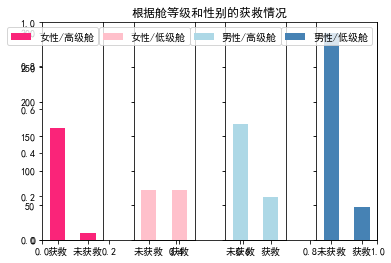

In [40]:
fig=plt.figure()

fig.set(alpha=0.65) # 设置图像透明度，无所谓

plt.title(u"根据舱等级和性别的获救情况")

 

ax1=fig.add_subplot(141)

data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', color='#FA2479')

ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)

ax1.legend([u"女性/高级舱"], loc='best')

 

ax2=fig.add_subplot(142, sharey=ax1)

data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', color='pink')

ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)

plt.legend([u"女性/低级舱"], loc='best')

 

ax3=fig.add_subplot(143, sharey=ax1)

data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar',color='lightblue')

ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)

plt.legend([u"男性/高级舱"], loc='best')

 

ax4=fig.add_subplot(144, sharey=ax1)

data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', color='steelblue')

ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)

plt.legend([u"男性/低级舱"], loc='best')

plt.subplots_adjust(wspace = 0.5)

plt.show()

In [46]:
g1 = DataFrame(data_train.groupby(['SibSp','Survived'])['PassengerId'].count())

display(g1)

 

g2 = DataFrame(data_train.groupby(['Parch','Survived'])['PassengerId'].count())

display(g2)

data_train.Cabin.value_counts()

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

B96 B98            4
G6                 4
C23 C25 C27        4
F33                3
F2                 3
E101               3
C22 C26            3
D                  3
E44                2
C125               2
C52                2
E67                2
B51 B53 B55        2
E25                2
C68                2
B22                2
C2                 2
F4                 2
B57 B59 B63 B66    2
D35                2
C83                2
C123               2
C65                2
D36                2
D20                2
C126               2
B18                2
B35                2
E8                 2
C93                2
                  ..
C54                1
C82                1
E58                1
A26                1
D19                1
C50                1
E50                1
A20                1
E12                1
C104               1
E68                1
F38                1
E36                1
E34                1
T                  1
A32                1
A36          

In [1]:
from sklearn.ensemble import RandomForestRegressor          #label是数值连续型变量。

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from pandas import DataFrame, Series

import pandas as pd

from sklearn.model_selection import GridSearchCV, train_test_split

import numpy as np

data_train = pd.read_csv('ch/Titanic-dataset/train.csv') 

def set_missing_ages(df):

    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]  # 把已有的数值型特征取出来丢进Random Forest Regressor中

    known_age = np.array(age_df[age_df.Age.notnull()])

    unknown_age = age_df[age_df.Age.isnull()].as_matrix() #转换成numpy array类型,便于切片。
    
    y = known_age[:, 0]   # y即目标年龄

    X = known_age[:, 1:]   # X即特征属性值
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)

    rfr.fit(X, y)

    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    df.Age[pd.isnull(df.Age)] = predictedAges
    
    return df, rfr

 

def set_Cabin_type(df):

    df.Cabin[pd.notnull(df.Cabin)] = "Yes"

    df.Cabin[pd.isnull(df.Cabin)] = "No"

    return df
    


def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

data_train['Family_Size'] = data_train['Parch'] + data_train['SibSp'] + 1

data_train['Family_Size_Category'] = data_train['Family_Size'].map(family_size_category) #map将列表中每个值对函数进行映射。
    
data_train, rfr = set_missing_ages(data_train)

data_train = set_Cabin_type(data_train)

bins = [0, 12, 18, 65, 100]

data_train['Age_group'] = pd.cut(data_train['Age'], bins)


dummies_Age = pd.get_dummies(data_train['Age_group'], prefix= 'Age')

dummies_Family = pd.get_dummies(data_train['Family_Size_Category'], prefix= 'Family')

dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Family, dummies_Age], axis=1)

df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Family_Size', 'Family_Size_Category', 'Age', 'Age_group'], 
        axis=1, inplace=True)



scaler = StandardScaler()                                                 #标准化，提高模型精度。

#df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))   #结果必须是一个2D矩阵，用reshape(-1， 1)转换即可。

df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1, 1))


split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)

train_df = split_train.filter(regex='Survived|Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Family_.*')
 
cv_df = split_cv.filter(regex='Survived|Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Family_.*')



#pandas filter选取符合正则化的属性值。

train_np = np.array(train_df)  #类型转换为np.array, 以便切片。

cv_np = np.array(cv_df)

y = train_np[:, 0]

X = train_np[:, 1:]

y_t = cv_np[:, 0]

X_t = cv_np[:, 1:]

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

grid_serch = GridSearchCV(LogisticRegression(), param_grid, cv = 5)

grid_serch.fit(X, y)


print('score:{}'.format(grid_serch.score(X_t, y_t)))

print('best param:{}'.format(grid_serch.best_estimator_))

data_test = pd.read_csv("ch/Titanic-dataset/test.csv")

data_test.Fare[pd.isnull(data_test.Fare)] = 0


# 接着我们对test_data做和train_data中一致的特征变换

# 首先用同样的RandomForestRegressor模型填上丢失的年龄

tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

null_age = tmp_df[data_test.Age.isnull()].as_matrix()

# 根据特征属性X预测年龄并补上

data_test['Family_Size'] = data_test['Parch'] + data_test['SibSp'] + 1

data_test['Family_Size_Category'] = data_test['Family_Size'].map(family_size_category) #map将列表中每个值对函数进行映射。

X1 = null_age[:, 1:] 

predictedAges = rfr.predict(X1)

data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges


data_test = set_Cabin_type(data_test)

bins = [0, 12, 18, 65, 100]

data_test['Age_group'] = pd.cut(data_test['Age'], bins)


dummies_Age = pd.get_dummies(data_test['Age_group'], prefix= 'Age')

dummies_Family = pd.get_dummies(data_test['Family_Size_Category'], prefix= 'Family')

dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Family, dummies_Age], axis=1)

df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Family_Size', 'Family_Size_Category', 'Age', 'Age_group'], 
             axis=1, inplace=True)

#df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1, 1))

df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1, 1))

test = df_test.filter(regex='Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Family_.*')


predictions = grid_serch.predict(test)

result = DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})


result.to_csv("ch/Titanic-dataset/logistic_regression_predictions.csv", index=False)



F:\anaconda\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\anaconda\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\anaconda\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


score:0.8134328358208955
best param:LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


F:\anaconda\lib\site-packages\ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\anaconda\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\anaconda\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


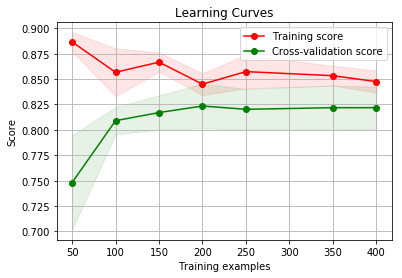

In [101]:
from sklearn.learning_curve import learning_curve

import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    
    plt.figure()
    
    plt.title(title)
    
    if ylim is not None:
        
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)    
    
    #learning_curve是展示不同数据量，算法学习得分,cv是展示某个因子，不同取值的算法得分
    
    train_scores_mean = np.mean(train_scores, axis=1)
    
    train_scores_std = np.std(train_scores, axis=1)
    
    test_scores_mean = np.mean(test_scores, axis=1)
    
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
                     
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
                     
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    
    
    return plt


title = "Learning Curves"

plot_learning_curve(SVC(gamma = 0.01, C = 100, kernel= 'rbf'), title,X, y, cv= None, n_jobs= 4, train_sizes=[50, 100, 150, 200, 250, 350, 400])

plt.show()

In [110]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}

svm = SVC(kernel= 'rbf')

grid_serch = GridSearchCV(svm, param_grid, cv = 5)

grid_serch.fit(X, y)


print('score:{}'.format(grid_serch.score(X_t, y_t)))

print('best param:{}'.format(grid_serch.best_estimator_))


predictions = grid_serch.predict(test)

result = DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})


result.to_csv("ch/Titanic-dataset/SVM_predictions.csv", index=False)

score:0.8246268656716418
best param:SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier          #label是数值连续型变量。

from sklearn.tree import DecisionTreeClassifier

#data_train = pd.read_csv('ch/Titanic-dataset/train.csv') 


param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'n_estimators': range(200, 300, 10)}

ada = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split = 4, min_samples_leaf= 3, max_depth = 5))

grid_search = GridSearchCV(ada, param_grid, cv = 10)

grid_search.fit(X, y)


print('score:{}'.format(grid_search.score(X_t, y_t)))

print('best param:{}'.format(grid_search.best_estimator_))



predictions = grid_serch.predict(test)

result = DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})


result.to_csv("ch/Titanic-dataset/ada_predictions.csv", index=False)

In [5]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble.weight_boosting:

class AdaBoostClassifier(BaseWeightBoosting, sklearn.base.ClassifierMixin)
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, optional (default=DecisionTreeClassifier)
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is required, as well as proper `classes_`
 |      and `n_classes_` attributes.
 |  
 |  n_estimators : integer, optional (default=50)
 |    